In [83]:
import json

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn import svm

data1 = json.load(open('../../data_resources/ned/training/ned_db_training_file_2018_05_23_10_37_17.json'))
data2 = json.load(open('../../data_resources/ned/training/ned_db_training_file_absolute_2018_05_23_10_37_17.json'))

data = []    

data = []
for obj in data2:
    if obj[0:-1] not in data:
        data.append(obj[0:-1])
    
# for obj in data1:
#     if obj not in data:
#         data.append(obj)
    



In [84]:
candidates = []
X = []
y = []

present_mentions = []
present_candidates = []

article_ids = []

for i in range(0,len(data)):

    
    obj = data[i]
    
    article_ids.append(obj[0])
    
    mention = obj[1]
    candidate_name = obj[3]
    
    if True:
#     if mention not in present_mentions and candidate_name not in present_candidates:
        present_mentions.append(mention)
        present_candidates.append(candidate_name)
        
        candidates.append(obj[2])

        if obj[-2] > 0:
            obj[-2] == 1
        
        xx = obj[4:-3]
#         print(np.shape(xx))
        
        
#         print(np.shape(xx))
        
        X.append(xx)
        y.append(obj[-1])
    

# f_name = f_name_similarity(entity.text, candidate)
# f_initials = f_initials_similarity(entity.text, candidate)
# f_first_name = f_first_name_similarity(entity.text, candidate)
# f_who_name = f_who_name_similarity(entity.text, candidate)
# f_location = f_location_similarity(document, candidate)
# f_role = f_role_in_document(document, candidate)
# f_party = f_party_similarity(document, candidate)
# f_context = f_context_similarity(document, doc_entities, candidate)
# f_gender = f_gender_similarity(entity.text, candidate)
    
# 1    
print(candidates[-2])
# 0.8,1,0,1.0,1.0,1,1.0,0.25,1.0,1.0,0.016

for obj in X[0:10]:
    print(obj)

# 1
print(y[-2])
print(len(X[-1]))

print(len(y))



2
[1.0, 1, 1, 1.0, 1.0, 1, 1.0, 0.05555555555555555, 1.0]
[0.8333333333333334, 1, 0, 1.0, 0.0, 0, 0, 0.0, 1.0]
[0.96, 1, 0, 1.0, 1.0, 0, 1.0, 0.18181818181818182, 1.0]
[0.7272727272727273, 1, 0, 1.0, 1.0, 1, 1.0, 0.14285714285714285, 1.0]
[0.41025641025641024, 0, 0, 0.43875, 0.0, 0, 0, 0.0, 0]
[1.0, 1, 1, 1.0, 1.0, 0, 1.0, 0.1111111111111111, 1.0]
[0.7368421052631579, 0, 0, 0.74875, 0.0, 0, 0, 0.0, 0]
[1.0, 1, 1, 1.0, 1.0, 1, 1.0, 0.1111111111111111, 1.0]
[0.8275862068965517, 0, 0, 0.74875, 0.0, 1, 1.0, 0.05263157894736842, 1.0]
[1.0, 1, 1, 1.0, 1.0, 0, 1.0, 0.1, 1.0]
1
9
346


In [85]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=7)

print('Feature  Accuracy')
for i in range(len(X[0])):
    
    X_r = []
    for obj in X:
        X_r.append([obj[i]])
        
#     plt.scatter(X_r, y, c=y)
#     plt.show()
    
    scores = cross_val_score(clf, X_r, y)
    print(scores.mean())
    
print('-')
scores = cross_val_score(clf, X, y)
print(scores.mean())

Feature  Accuracy
0.8670164917541229
0.820839580209895
0.8496501749125437
0.8901299350324837
0.8645177411294354
0.5808095952023988
0.809095452273863
0.803448275862069
0.5779110444777611
-
0.9652673663168415


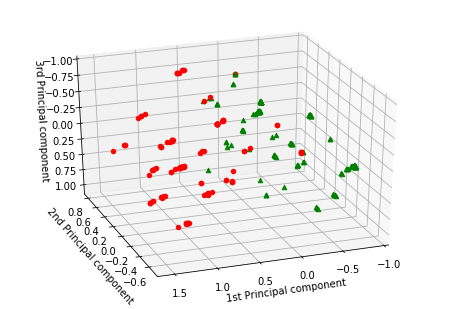

In [86]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
for i in range(0,len(X_reduced)):
    if y[i] == 1:
        ax.scatter(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], c='green', marker='^')
    else:
        ax.scatter(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], c='red', marker='o')
ax.set_xlabel('1st Principal component')
ax.set_ylabel('2nd Principal component')
ax.set_zlabel('3rd Principal component')
plt.show()

In [87]:
def plot_learning_curve(clf_name, estimator, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title('Learning curve: {}'.format(clf_name))
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt

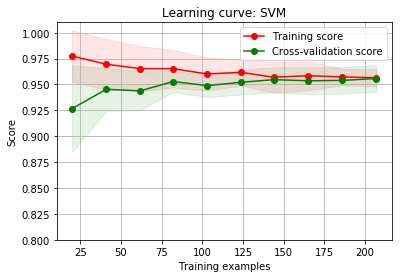

0.9382352941176471


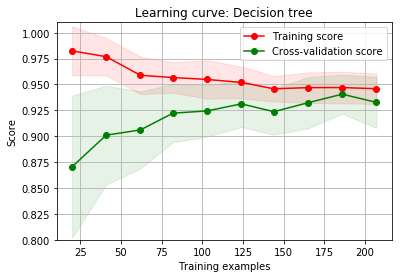

0.9419117647058822


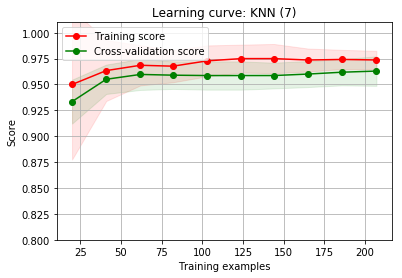

0.9703227124183007


/home/rothweiler/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rothweiler/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rothweiler/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


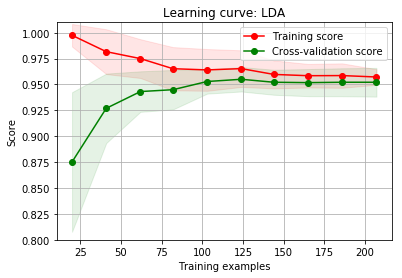

0.9503880718954247


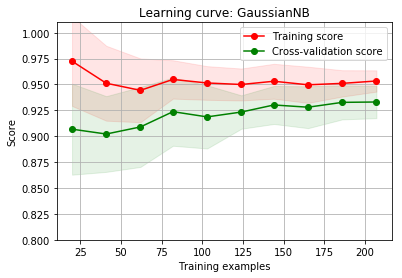

0.9299223856209149


In [88]:
clfs = [
    svm.SVC(kernel='linear', probability=True),
    DecisionTreeClassifier(max_depth = 2),
    KNeighborsClassifier(n_neighbors=7),
    LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    GaussianNB()
]

clf_names = [
    'SVM',
    'Decision tree',
    'KNN (7)',
    'LDA',
    'GaussianNB'
]

for i in range(0,len(clfs)):

    clf = clfs[i]
    cv = ShuffleSplit(n_splits=20, test_size=0.4)
    plot_learning_curve(clf_names[i], clf, X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=30)

    clf.fit(X,y)

    scores = cross_val_score(clf, X, y, cv=20)
    print(np.mean(scores))

In [56]:
BIN_SIZE = 10

c_bins = []
X_bins = []
y_bins = []

for i in range(BIN_SIZE,80,BIN_SIZE):
    
    current_c_bin = []
    current_X_bin = []
    current_y_bin = []

    
    for j in range(0,len(X)):
        if candidates[j] < i and candidates[j] > i-BIN_SIZE:
            current_c_bin.append(candidates[j])
            current_X_bin.append(X[j])
            current_y_bin.append(y[j])
    
    
    c_bins.append(current_c_bin)
    X_bins.append(current_X_bin)
    y_bins.append(current_y_bin)
    
for b in c_bins:
    print(b)

[1, 4, 4, 2, 2, 1, 1, 4, 4, 6, 6, 7, 7, 1, 1, 1, 2, 2, 5, 5, 7, 7, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 7, 7, 7, 7, 7, 7, 1, 1, 1, 3, 3, 1, 3, 3, 1, 7, 7, 7, 7, 1, 1, 2, 2, 1, 5, 5, 2, 1, 2, 7, 7, 2, 1, 2, 7, 7, 1, 1, 1, 1, 1, 7, 7, 7, 7, 5, 5, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 5, 5, 1, 2, 2, 1, 5, 5, 2, 1, 2, 7, 7, 7, 7, 2, 2, 1, 1, 1, 2, 2, 7, 7, 1, 1, 1, 1, 1, 7, 7, 7, 7, 2, 2, 1, 1, 7, 7, 4, 4, 1, 1, 8, 8, 7, 7, 1, 1, 2, 2, 5, 5, 4, 4, 5, 5, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 5, 5, 5, 5, 3, 3, 7, 7, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 5, 5, 1, 5, 5, 2, 2, 4, 4, 1, 5, 5, 1, 1, 1, 1, 2, 2, 4, 4, 1, 2, 2, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 5, 5, 2, 2, 1, 1, 1, 2, 2, 2, 2, 7, 7, 1, 2, 2, 3, 3, 3, 3, 1, 2, 2]
[14, 14, 12, 12, 15, 15, 15, 15, 16, 16, 14, 14, 19, 19, 13, 13, 12, 12, 12, 12]
[22, 22, 22, 22]
[36, 36, 36, 36, 31, 31]
[42, 42, 44, 44, 42, 42, 42, 42]
[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 52, 52, 52, 52]
[62, 62, 62, 62, 62

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


scores = []

for i in range(0,len(c_bins)):
    scores.append([])

    
for i in range(0,200):

    X_train = []
    y_train = []

    X_test_bins = []
    y_test_bins = []

    for i in range(0,len(c_bins)):
        current_X_train, current_X_test, current_y_train, current_y_test = train_test_split(X_bins[i], y_bins[i], test_size=0.2, shuffle=True)

        for x in current_X_train:
            X_train.append(x)
        for y in current_y_train:
            y_train.append(y)

        current_X_test_bin = []
        current_y_test_bin = []

        for x in current_X_test:
            current_X_test_bin.append(x)
        for y in current_y_test:
            current_y_test_bin.append(y)

        X_test_bins.append(current_X_test_bin)
        y_test_bins.append(current_y_test_bin)

    clf = KNeighborsClassifier(n_neighbors=3)
    clf = clf.fit(X_train,y_train)

    for i in range(0,len(X_test_bins)):
        y_pred = clf.predict(X_test_bins[i])
        scores[i].append(accuracy_score(y_test_bins[i], y_pred))

# Bins opsplitten in 80/20

# Classifier trainen op 80 van alle bins.

# Classifier testen op 20 per bin

In [9]:
x_plot = []
mean_scores = []
min_std_scores = []
max_std_scores = []

for score in scores:
    mean_scores.append(np.mean(score))
    
    
    
    min_std_scores.append(np.mean(score) - np.std(score))
    max_std_scores.append(min(1.0, (np.mean(score) + np.std(score))))
    

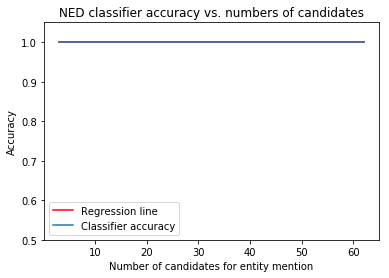

In [10]:
x_plot = []
for i in range(0,len(c_bins)):
    x_plot.append(np.mean(c_bins[i]))

    

fit = np.polyfit(x_plot, mean_scores, deg=1)

plt.plot(x_plot, [fit[0] * x + fit[1] for x in x_plot], color='red', label='Regression line')

plt.plot(x_plot, mean_scores, label='Classifier accuracy')

plt.fill_between(x_plot, min_std_scores, max_std_scores, alpha=0.1, color="b")

plt.xlabel('Number of candidates for entity mention')
plt.ylabel('Accuracy')
plt.title('NED classifier accuracy vs. numbers of candidates')
plt.ylim(ymin=0.50,ymax=1.05)
plt.legend()
plt.show()

